<a href="https://colab.research.google.com/github/dragoa/AI/blob/main/ML/00/ERM_and_SRM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import numpy.matlib as nml
import matplotlib.pyplot as plt

In [ ]:
# inizializing random seed generator
np.random.seed(13)

In [ ]:
# oracle for generating the data distribution
def oracle(x):
  return x**2

In [ ]:
n = 8 # num of samples for generating distribution
sigma = .1 # for the random noise mean = 0 and variance = sigma

# generating points
x = np.random.rand(n)
# my target with gaussian noise
y = oracle(x) + sigma*np.random.rand(n)

x = np.asmatrix(x).transpose()
y = np.asmatrix(y).transpose()

# on the line we have the samples, on the column we have the features
x.shape

(8, 1)

In [ ]:
# numb of samples
nt = 1000
xt = np.linspace(0,1,nt) # 10 elements equally distributed between 0 and 1
yt = oracle(xt)

xt = np.asmatrix(xt).transpose()
yt = np.asmatrix(yt).transpose()

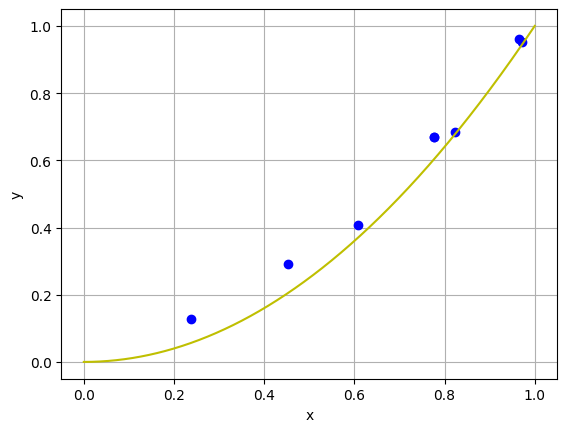

In [ ]:
fig, ax = plt.subplots()
ax.plot(x,y,'bo')
ax.plot(xt,yt,'y')
ax.set(xlabel='x', ylabel='y')
ax.grid()

I want to construct an algorithm that learns from this data a model.
We use at first Empirical risk minimization.
> 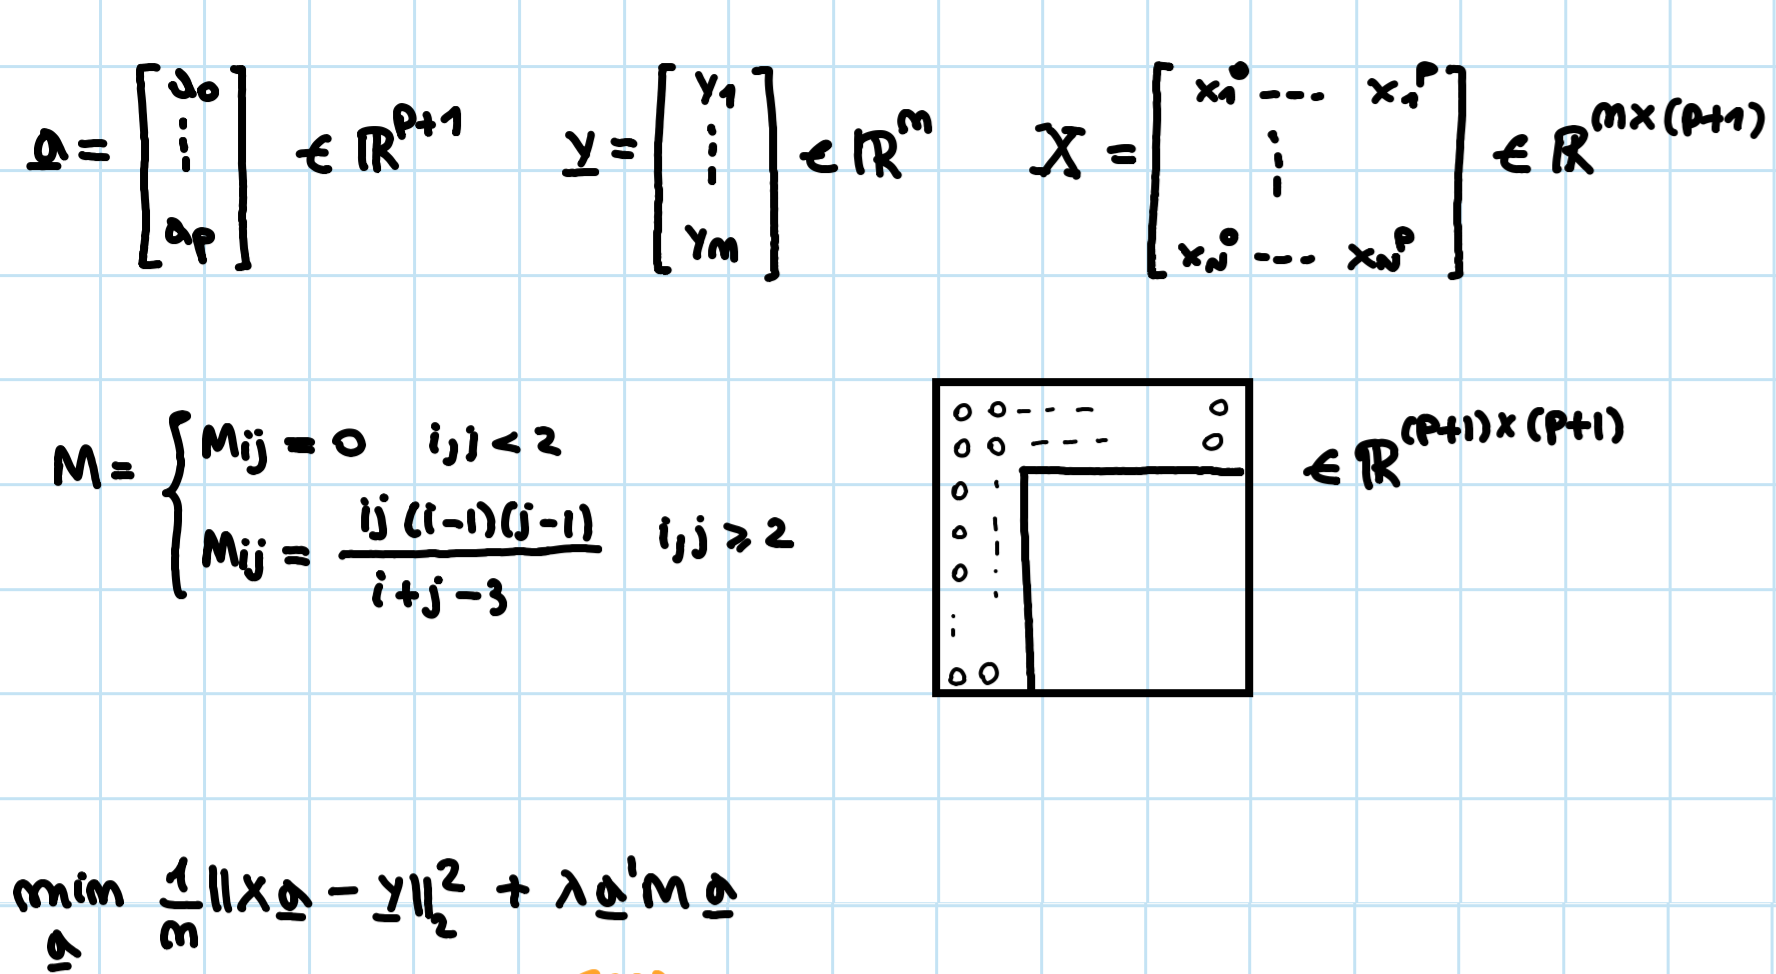

We don't have any complexity term (C(f) = 0 because lambda = 0), so the system we have to solve is **X'X*a = X'y**

In [ ]:
# ERM

p = 2 # degree of the poly
# try also with p=1, the model is better for n=3 respect to p=2!

X = nml.ones((n,1)) # (n,(p+1))
Xt = nml.ones((nt,1)) # (nt,(p+1))

for i in range(1,p+1):
  X = np.concatenate((X, np.power(x,i)), axis=1)
  Xt = np.concatenate((Xt, np.power(xt,i)), axis=1)

# a = (X'*X)\(X'*y)
a = np.linalg.solve(np.matmul(np.transpose(X),X),np.matmul(np.transpose(X),y))

# estimation of the function in each point
yp = np.matmul(Xt,a)

err = np.mean(np.abs(yp-yt))
err

0.05877034347794563

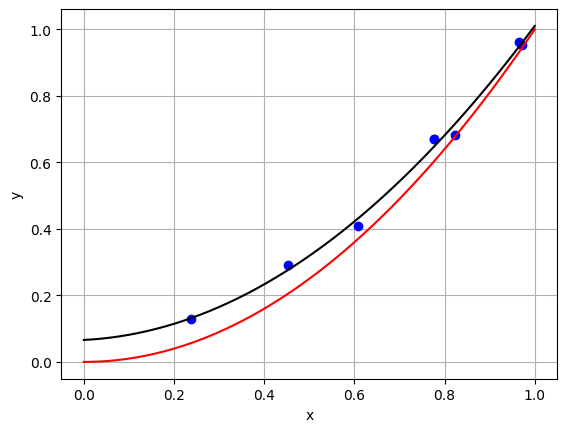

In [ ]:
fig, ax = plt.subplots()
ax.plot(x,y,'bo')
ax.plot(xt,yt,'r')
# prediction of the model that I learned from the data on the same point of the oracle
ax.plot(xt,yp,'k')
ax.set(xlabel='x',ylabel='y')
ax.grid()

So having information about the oracle (the distribution that generated my data) doesn't mean I'll get a better result. This is why there's always noise in my data, so sometimes is better to use a simpler noise so I have less chanche to fit the noise and not the data!!

Two options:

*   have a better accuracy on the mesurament -> costly
*   collect more data -> reduces the noise



Structural Risk Minimization

In [ ]:
# SRM

p = 2 # degree of the poly
lambdA = 1 # between 0 and inf
# if I increase lambda I get something simpler, If I decrease it I get something more complex

# try also with p=1, the model is better for n=3 respect to p=2!
X = nml.ones((n,1)) # (n,(p+1))
Xt = nml.ones((nt,1)) # (nt,(p+1))

for i in range(1,p+1):
  X = np.concatenate((X, np.power(x,i)), axis=1)
  Xt = np.concatenate((Xt, np.power(xt,i)), axis=1)

M = nml.zeros((p+1,p+1))
for i in range(2,p+1):
  for j in range(2,p+1):
    M[i,j] = i*(i-1)*j*(j-1)/(i+j-3)

# a = (X'*X + lambda*M)\(X'*y)
a = np.linalg.solve(np.matmul(np.transpose(X),X)+lambdA*M, np.matmul(np.transpose(X), y))

# estimation of the function in each point
yp = np.matmul(Xt,a)

# empirical error
err = np.mean(np.abs(yp-yt))
err

0.07919130958116417

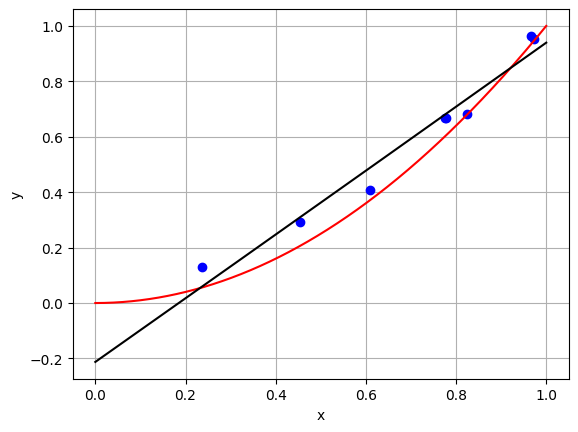

In [ ]:
fig, ax = plt.subplots()
ax.plot(x,y,'bo')
ax.plot(xt,yt,'r')
ax.plot(xt,yp,'k')
ax.set(xlabel='x',ylabel='y')
ax.grid()

For lambda=1 it seems a poly on degree 1, although it is of degree 2.